In [20]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
DATA_PATH = 'c:\\Users\\Eugene\\Documents\\Git\\netology_exercises\\4_1\\names\\'

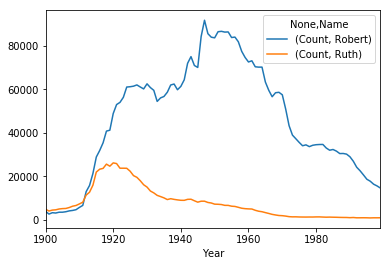

In [73]:
def read_data(years):
    cols = ['Name','Gender','Count']
    year_names = {}
    for year in years:
        try:
            year_names[str(year)] = pd.read_csv('{}yob{}.txt'
                                                .format(DATA_PATH, str(year).strip('[,]')), names=cols)
        except FileNotFoundError:
            print('File {}yob{}.txt not found!'.format(DATA_PATH, str(year).strip('[,]')))
            continue
    return pd.concat(year_names, names=['Year', 'Pos'])

def names_dynamics(years, names):    
    all_names = read_data(years)
    name_dynamics = all_names.groupby([all_names.index.get_level_values(0), 'Name']).sum()
    return name_dynamics.query('Name == {}'.format(names)).unstack('Name')

names_dynamics(range(1900, 2000), ['Ruth', 'Robert']).plot()
        

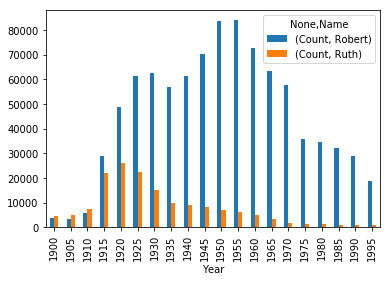

In [39]:
names_dynamics(range(1900, 2000, 5), ['Ruth', 'Robert']).plot.bar()

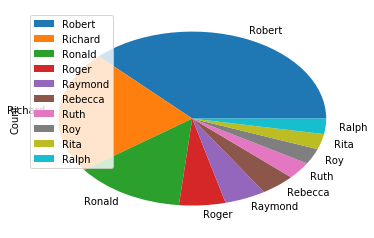

In [82]:
names1950 = read_data((1950,))
r_names = [name for name in names1950['Name'] if name[0] is 'R']
names1950.groupby('Name').sum().sort_values(by='Count', ascending=False).\
                          query('Name == {}'.format(r_names)).head(10).plot.pie(y='Count')

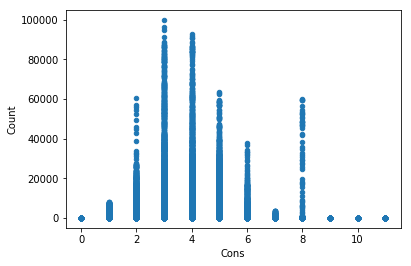

In [88]:
all_names = read_data(range(1900, 2000))
all_names.groupby('Name').sum()
all_names['Cons'] = all_names.apply(lambda row: 
                                    sum(1 for x in row.Name.lower() if x not in 'aeiou'), axis=1)
all_names.plot.scatter(x='Cons', y='Count')